---
format: 
  html:
    embed-resources: true
execute:
  echo: true
code-fold: true
title: Lab 5: Insurance Costs
author: James Compagno
jupyter: python3
---

https://kbodwin.github.io/GSB-544-private/Lab5.html

https://canvas.calpoly.edu/courses/166331/assignments/1322243

https://ds-ml-with-python.github.io/Course-Textbook/10-multiple_linear_regression.html

# Part One: Data Exploration

The dataset we will study for this assignment contains information about health insurance costs for individuals with no dependents (children) in the United States. The information contained in the data is:

    -Age of primary beneficiary

    -Gender of primary beneficiary (only female, male recorded)

    -Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

    -Whether the beneficiary smokes

    -The beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

    -Individual medical costs billed by health insurance

You can find this data at: https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1

In [108]:
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
import plotnine as p9
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import textwrap
#import patchworklib as pw

## 1.Read in the dataset, and display some summaries of the data.

In [109]:
df = pd.read_csv("insurance_costs_1.csv")

In [110]:
df.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [111]:
len(df)

431

## 2. Fix any concerns you have about the data.

In [112]:
dat = pd.get_dummies(df)

In [113]:
dat.head()

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,True,False,False,True,False,False,False,True
1,33,22.705,21984.47061,False,True,True,False,False,True,False,False
2,32,28.880,3866.85520,False,True,True,False,False,True,False,False
3,31,25.740,3756.62160,True,False,True,False,False,False,True,False
4,60,25.840,28923.13692,True,False,True,False,False,True,False,False


## 3. Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

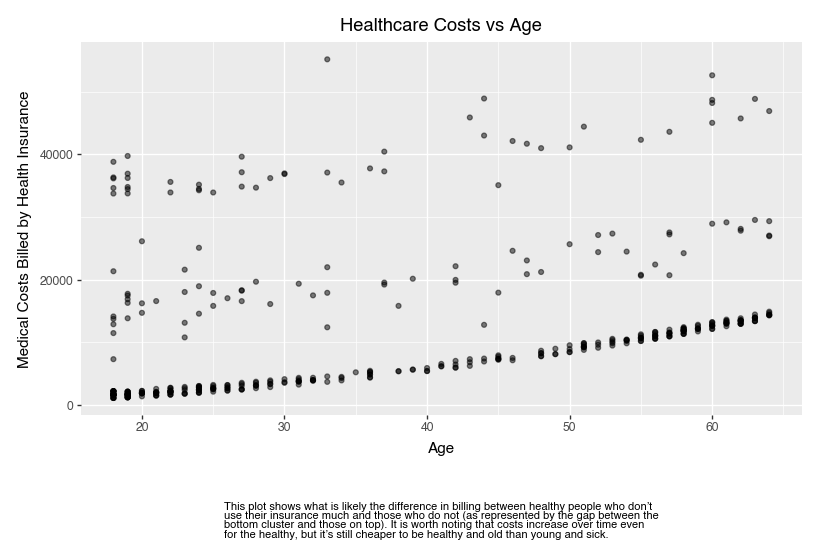

In [114]:
# Explanatory text
text = ("This plot shows what is likely the difference in billing between healthy people who "
        "don’t use their insurance much and those who do not (as represented by the gap between "
        "the bottom cluster and those on top). It is worth noting that costs increase over time "
        "even for the healthy, but it’s still cheaper to be healthy and old than young and sick.")

# wrap it
wrapped = textwrap.fill(text, width=90)

p1 = (p9.ggplot(dat, 
    p9.aes(
        x='age', 
        y='charges'))
      + p9.geom_point(alpha=0.5)
      + p9.labs(
          title='Healthcare Costs vs Age',
          x='Age',
          y='Medical Costs Billed by Health Insurance',
          caption=wrapped
      )
      + p9.theme(
          figure_size=(8, 5),
          plot_caption=p9.element_text(size=8, ha='center', va='top')
      )
     )

p1


This plot shows what is likely the difference in billing between healthy people who dont use their insurance much and those who do not (as represented by the gap between the bottom cluster and those on top). It is worth noting that costs increase over time even for the healthy but its still cheaper to be healthy and old than young and sick.

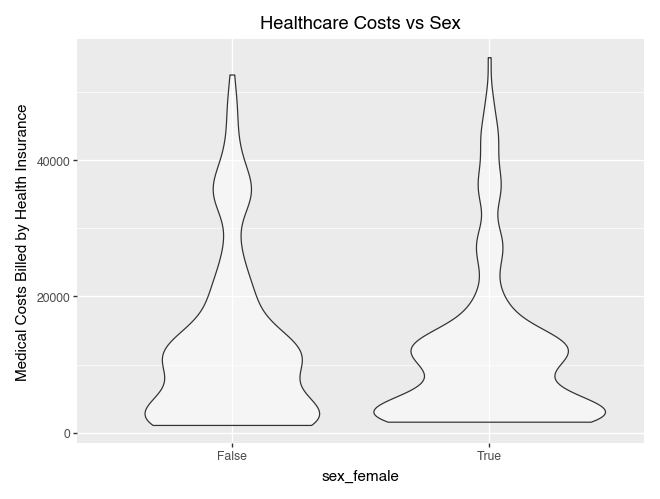

In [115]:
p2 = (p9.ggplot(dat, 
        p9.aes(
                x='sex_female', 
                y='charges'))
      + p9.geom_violin(alpha=0.5)
      + p9.labs(
                title='Healthcare Costs vs Sex',
                x='sex_female', 
                y='Medical Costs Billed by Health Insurance'))
p2

It is interesting that female is more bottom heavy for costs than for male, however it has a higher ceiling. 

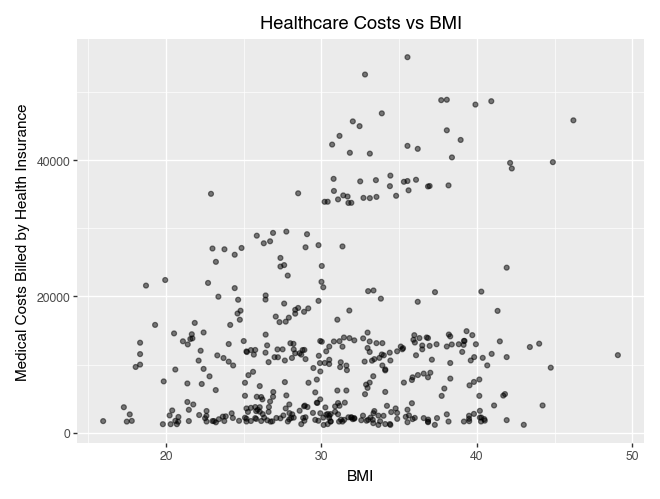

In [116]:
p3 = (p9.ggplot(dat, 
        p9.aes(
                x='bmi', 
                y='charges'))
      + p9.geom_point(alpha=0.5)
      + p9.labs(
                title='Healthcare Costs vs BMI',
                x='BMI', 
                y='Medical Costs Billed by Health Insurance')
        )
p3

It is intresting to note that even those with a higher BMI can still have lower healthcare costs. As a matter of fact it seems that there is only an correlation between higher BMIs and higher healthcare costs for some individuals. If the data was made so that Medical Costs cutoff at 20000 there might not be much of a positive trend at all.

# Part Two: Simple Linear Models

## 1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

In [117]:
#Prep Data for training
X = dat.drop(columns=['charges'])
y = dat['charges']

In [118]:
#Model Storage 
model_library = {}
training_results = []
records = []

In [ ]:
# Model
cols_Physical = ['age']
model_library["Linear_Age_Only"] = LinearRegression().fit(X[cols_Physical], y)

# Predictions & metrics
yhat = model_library["Linear_Age_Only"].predict(X[cols_Physical]) 
mse = mean_squared_error(y, yhat)
records.append({
    "Model": "Linear_Age_Only", 
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y, yhat)
})

#Display Data - Cumulative 
df2 = (pd.DataFrame(records)
              .sort_values(["Model"])
              .reset_index(drop=True))
df2

# #Data for plotting
# df_plot = X[cols_Physical].copy()
# df_plot['charges'] = y 
# df_plot['y_pred'] = yhat
# df_plot = df_plot.dropna().sort_values('age')

# #Plot
# name_plot = (
#     p9.ggplot(df_plot, p9.aes(x='age', y='charges'))
#     + p9.geom_point(shape='o', color='black', stroke=0.4, alpha=1)
#     + p9.geom_line(p9.aes(y='y_pred'), color='red', size=1.2)
#     + p9.scale_size(range=(1, 20))
#     + p9.labs(
#         title='Linear Regression: Charges vs Age',
#         x='Age',
#         y='Charges'
#     )
#     + p9.theme_minimal()
# )

# name_plot

,Model,RMSE,MSE,R2
0,Linear_Age_Only,11257.85361,1.267393e+08,0.099381


Interpretation: Age alone is insuffienct in explaining charges, MSE and RMSE are unacceptably high and R2 way too low. This was seen by the seperation in the age data. 

In [120]:
# model1 = dat[['age', 'charges']].dropna().copy()

# X = model1[['age']]
# y = model1['charges']

# lr = LinearRegression()
# lr_fitted = lr.fit(X, y)

# model1['y_pred'] = lr_fitted.predict(X)
# model1 = model1.sort_values('age')

# linear_plot = (
#     p9.ggplot(model1, p9.aes(x='age', y='charges'))
#     + p9.geom_point(shape='o', color='black', stroke=0.4, alpha=1)
#     + p9.geom_line(p9.aes(y='y_pred'), color='red', size=1.2)
#     + p9.scale_size(range=(1, 20))
#     + p9.labs(
#         title='Linear Regression: Bill Depth vs Bill Length',
#         x='Bill length (mm)',
#         y='Bill depth (mm)'
#     )
#     + p9.theme_minimal()
# )

# linear_plot

## 2. Make a model that also incorporates the variable sex. Report your results.

In [ ]:
# Model
cols_Physical = ['age', 'sex_female']
model_library["Linear_Age_Sex"] = LinearRegression().fit(X[cols_Physical], y)

# Predictions & metrics
yhat = model_library["Linear_Age_Sex"].predict(X[cols_Physical])
mse = mean_squared_error(y, yhat)
records.append({
    "Model": "Linear_Age_Sex", 
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y, yhat)
})

#Display Data - Cumulative 
df2 = (pd.DataFrame(records)
              .sort_values(["Model"])
              .reset_index(drop=True))
df2

# #Data for plotting
# #Not Correct FIX LATER
# df_plot = X[cols_Physical].copy()
# df_plot['charges'] = y  # ensure y aligns with X's index
# df_plot['y_pred'] = yhat
# df_plot = df_plot.dropna().sort_values('age')

# #Plot
# name_plot = (
#     p9.ggplot(df_plot, p9.aes(x='age', y='charges'))
#     + p9.geom_point(shape='o', color='black', stroke=0.4, alpha=1)
#     + p9.geom_line(p9.aes(y='y_pred'), color='red', size=1.2)
#     + p9.scale_size(range=(1, 20))
#     + p9.labs(
#         title='Linear Regression: Charges vs Age',
#         x='Age',
#         y='Charges'
#     )
#     + p9.theme_minimal()
# )

# name_plot

,Model,RMSE,MSE,R2
0,Linear_Age_Only,11257.853610,1.267393e+08,0.099381
1,Linear_Age_Sex,11253.174649,1.266339e+08,0.100130


## 3. Now make a model that does not include sex, but does include smoker. Report your results.

In [ ]:
# Model
cols_Physical = ['age', 'smoker_yes']
model_library["Linear_Age_Smoker"] = LinearRegression().fit(X[cols_Physical], y)

# Predictions & metrics
yhat = model_library["Linear_Age_Smoker"].predict(X[cols_Physical])
mse = mean_squared_error(y, yhat)
records.append({
    "Model": "Linear_Age_Smoker", 
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y, yhat)
})

#Display Data - Cumulative 
df2 = (pd.DataFrame(records)
              .sort_values(["Model"])
              .reset_index(drop=True))
df2

# #Data for plotting
# #Not Correct FIX LATER
# df_plot = X[cols_Physical].copy()
# df_plot['charges'] = y  # ensure y aligns with X's index
# df_plot['y_pred'] = yhat
# df_plot = df_plot.dropna().sort_values('age')

# #Plot
# name_plot = (
#     p9.ggplot(df_plot, p9.aes(x='age', y='charges'))
#     + p9.geom_point(shape='o', color='black', stroke=0.4, alpha=1)
#     + p9.geom_line(p9.aes(y='y_pred'), color='red', size=1.2)
#     + p9.scale_size(range=(1, 20))
#     + p9.labs(
#         title='Linear Regression: Charges vs Age',
#         x='Age',
#         y='Charges'
#     )
#     + p9.theme_minimal()
# )

# name_plot

,Model,RMSE,MSE,R2
0,Linear_Age_Only,11257.853610,1.267393e+08,0.099381
1,Linear_Age_Sex,11253.174649,1.266339e+08,0.100130
2,Linear_Age_Smoker,5806.877945,3.371983e+07,0.760384


## 4.Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

In [123]:
df2 = (pd.DataFrame(records)
              .sort_values(["Model"])
              .reset_index(drop=True))
df2

,Model,RMSE,MSE,R2
0,Linear_Age_Only,11257.853610,1.267393e+08,0.099381
1,Linear_Age_Sex,11253.174649,1.266339e+08,0.100130
2,Linear_Age_Smoker,5806.877945,3.371983e+07,0.760384


Model 3 (Linear_Age_Smoker) is siginificantly better than Model 2 or Model 1, not only are its error terms an order of magnitude lower its R2 value is signifiantly better 

# Part Three: Multiple Linear Models

Now let’s consider including multiple quantitative predictors.

## 1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

In [ ]:
# Model
cols_Physical = ['age', 'bmi']
model_library["Linear_Age_BMI"] = LinearRegression().fit(X[cols_Physical], y)

# Predictions & metrics
yhat = model_library["Linear_Age_BMI"].predict(X[cols_Physical])
mse = mean_squared_error(y, yhat)
records.append({
    "Model": "Linear_Age_BMI", 
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y, yhat)
})

#Display Data - Cumulative 
df2 = (pd.DataFrame(records)
              .sort_values(["Model"])
              .reset_index(drop=True))
df2

# #Data for plotting
# #Not Correct FIX LATER
# df_plot = X[cols_Physical].copy()
# df_plot['charges'] = y  # ensure y aligns with X's index
# df_plot['y_pred'] = yhat
# df_plot = df_plot.dropna().sort_values('age')

# #Plot
# name_plot = (
#     p9.ggplot(df_plot, p9.aes(x='age', y='charges'))
#     + p9.geom_point(shape='o', color='black', stroke=0.4, alpha=1)
#     + p9.geom_line(p9.aes(y='y_pred'), color='red', size=1.2)
#     + p9.scale_size(range=(1, 20))
#     + p9.labs(
#         title='Linear Regression: Charges vs Age',
#         x='Age',
#         y='Charges'
#     )
#     + p9.theme_minimal()
# )

# name_plot

,Model,RMSE,MSE,R2
0,Linear_Age_BMI,11126.205084,1.237924e+08,0.120321
1,Linear_Age_Only,11257.853610,1.267393e+08,0.099381
2,Linear_Age_Sex,11253.174649,1.266339e+08,0.100130
3,Linear_Age_Smoker,5806.877945,3.371983e+07,0.760384


While all 3 metrics (RMSE, MSE, & R2) are better in the new Linear_Age_BMI model compared to Linear_Age_Only are better, both are very bad at describing the data. 

## 2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

In [ ]:
# Model
cols_Physical = ['age', 'bmi']
model_library["Quadratic_Age_Age2"] = LinearRegression().fit(X[cols_Physical], y)

# Predictions & metrics
yhat = model_library["Quadratic_Age_Age2"].predict(X[cols_Physical])
mse = mean_squared_error(y, yhat)
records.append({
    "Model": "Quadratic_Age_Age2", 
    "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y, yhat)
})

#Display Data - Cumulative 
df2 = (pd.DataFrame(records)
              .sort_values(["Model"])
              .reset_index(drop=True))
df2

# #Data for plotting
# #Not Correct FIX LATER
# df_plot = X[cols_Physical].copy()
# df_plot['charges'] = y  # ensure y aligns with X's index
# df_plot['y_pred'] = yhat
# df_plot = df_plot.dropna().sort_values('age')

# #Plot
# name_plot = (
#     p9.ggplot(df_plot, p9.aes(x='age', y='charges'))
#     + p9.geom_point(shape='o', color='black', stroke=0.4, alpha=1)
#     + p9.geom_line(p9.aes(y='y_pred'), color='red', size=1.2)
#     + p9.scale_size(range=(1, 20))
#     + p9.labs(
#         title='Linear Regression: Charges vs Age',
#         x='Age',
#         y='Charges'
#     )
#     + p9.theme_minimal()
# )

# name_plot

## 3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

## 4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

## 5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

## 6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.